In [ ]:
#product sentiment analysis using logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('fashion_products.csv')
df.head()
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [3]:
print(df.isnull().sum())
df.dropna(inplace=True)
df['Review_Label'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


In [4]:
x = df[['User ID', 'Price', 'Product ID']]
y = df['Review_Label']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model= LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.535


In [10]:
uid = int(input("Enter User ID: "))
price = float(input("Enter Price: "))
pid = int(input("Enter Product ID: "))
user_input = np.array([[uid, price, pid]])
prediction = model.predict(user_input)[0]
print("Review:", "Positive" if prediction == 1 else "Negative")

Review: Negative


c:\python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


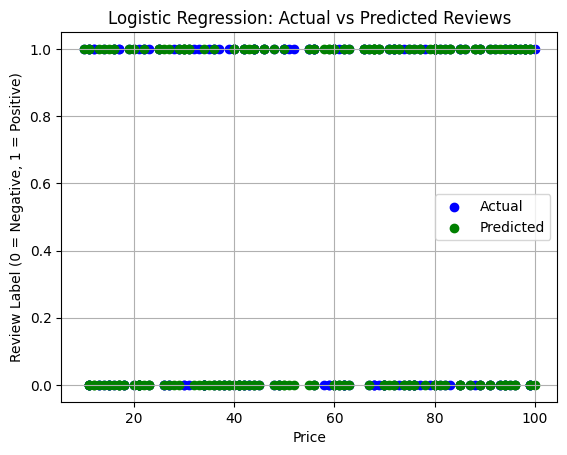

In [ ]:
plt.scatter(x_test['Price'], y_test, color='blue', label='Actual') 
plt.scatter(x_test['Price'], y_pred, color='green', label='Predicted') 
plt.title('Logistic Regression: Actual vs Predicted Reviews')
plt.xlabel('Price')
plt.ylabel('Review Label (0 = Negative, 1 = Positive)')
plt.legend()
plt.grid(True)
plt.show()